In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
mse = [0, 2.5, 5, 10, 20, 100, 200]

In [54]:
def cargar(archivo):
    file = open(archivo, "rb")
    clase = pickle.load(file)
    file.close()
    return clase

def sacar_promedio(datos, w, indices):
    if w == 1.5:
        results = datos.datos_w15
    elif w == 2:
        results = datos.datos_w2
    elif w == 4:
        results = datos.datos_w4
    else:
        results = datos.datos_wextra
    tiempos = [dato.tiempos for dato in results]
    nodos = [dato.nodos for dato in results]
    tiempos_filtrado = [tiempos[i] for i in indices]
    nodos_filtrado = [nodos[i] for i in indices]
    can_mse = len(nodos_filtrado[0])
    tiempos, nodos = [], []
    for i in range(0, can_mse):
        datos = []
        for problema in tiempos_filtrado:
            datos.append(problema[i])
        tiempos.append(np.mean(datos))
    for i in range(0, can_mse):
        datos = []
        for problema in nodos_filtrado:
            datos.append(problema[i])
        nodos.append(np.mean(datos))
    return tiempos, nodos

def lineas_archivo(archivo):
    file = open("archivos terminal//" + archivo, "r")
    lineas = file.readlines()
    file.close()
    for i in range(0, len(lineas)):
        lineas[i] = lineas[i].strip("\n")
    return lineas

def obtener_g(archivo, weight):
    archivo = lineas_archivo(archivo)
    valores_g = [], [], [], [], [], [], []
    lineas_g_ = []
    for linea in archivo:
        if "Valor g:" in linea:
            lineas_g_.append(int(linea.strip("Valor g: ")))
    if weight = 1.2:
        w = 0
    elif weight = 1.5:
        w = 1
    elif weight = 2:
        w = 2
    else:
        w = 3
    # for i in range(0, 30):
        
    return lineas_g

In [23]:
astar1 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--a_star - LMCUT NUEVO.pickle")
fs1 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fs--k=4 - LMCUT NUEVO.pickle")
best1 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fds_best--k=4 LMCUT NUEVO.pickle")

g_astar1 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--a_star - LISTA G.pickle") 

In [28]:
g_astarw12 = [10, 9, 7, 6, 7, 7,9, 8, 8, 8, 5, 7, 8,8,8,8, 6, 7, 9, 7, 9, 9, 9, 7, 8, 9, 9, 9,8,7]
len(g_astarw12)

30

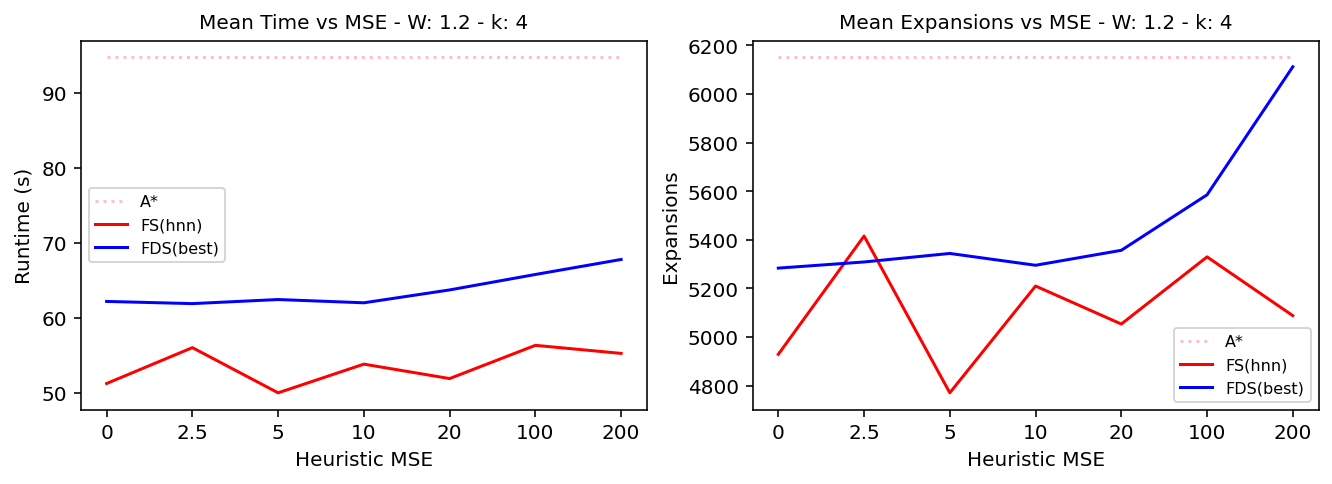

In [32]:
astar_, fs_, best_ = astar1, fs1, best1
minimo = 0
indices = [i for i in range(0, 30)]

# --------------------------------W = 1.2--------------------------------
log = False
w = 1.2
astar = sacar_promedio(astar_, w, indices)
fs = sacar_promedio(fs_, w, indices)
# pos = sacar_promedio(pos_, w, indices)
best = sacar_promedio(best_, w, indices)
# gráfico tiempo vs mse
fig,ax = plt.subplots(dpi=144, figsize = [10,4], ncols=2)
fig.tight_layout(pad=3)
ax[0].plot([1,2,3,4,5,6,7], astar[0], label="A*", c="pink", ls="dotted")
ax[0].plot([1,2,3,4,5,6,7], fs[0], label="FS(hnn)", c="red")
# ax[0].plot([1,2,3,4,5,6,7], pos[0], label="FDS(rank)", c="green")
ax[0].plot([1,2,3,4,5,6,7], best[0], label="FDS(best)", c="blue")
ax[0].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[0].legend(fontsize=8)
ax[0].set_xlabel("Heuristic MSE", fontsize=10)
ax[0].set_ylabel("Runtime (s)", fontsize=10)
ax[0].set_title(f"Mean Time vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")
# gráfico expansiones vs mse
fig.tight_layout(pad=3)
ax[1].plot([1,2,3,4,5,6,7], astar[1], label="A*", c="pink", ls="dotted")
ax[1].plot([1,2,3,4,5,6,7], fs[1], label="FS(hnn)", c="red")
# ax[1].plot([1,2,3,4,5,6,7], pos[1], label="FDS(rank)", c="green")
ax[1].plot([1,2,3,4,5,6,7], best[1], label="FDS(best)", c="blue")
ax[1].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[1].legend(fontsize=8)
ax[1].set_xlabel("Heuristic MSE", fontsize=10)
ax[1].set_ylabel("Expansions", fontsize=10)
ax[1].set_title(f"Mean Expansions vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")

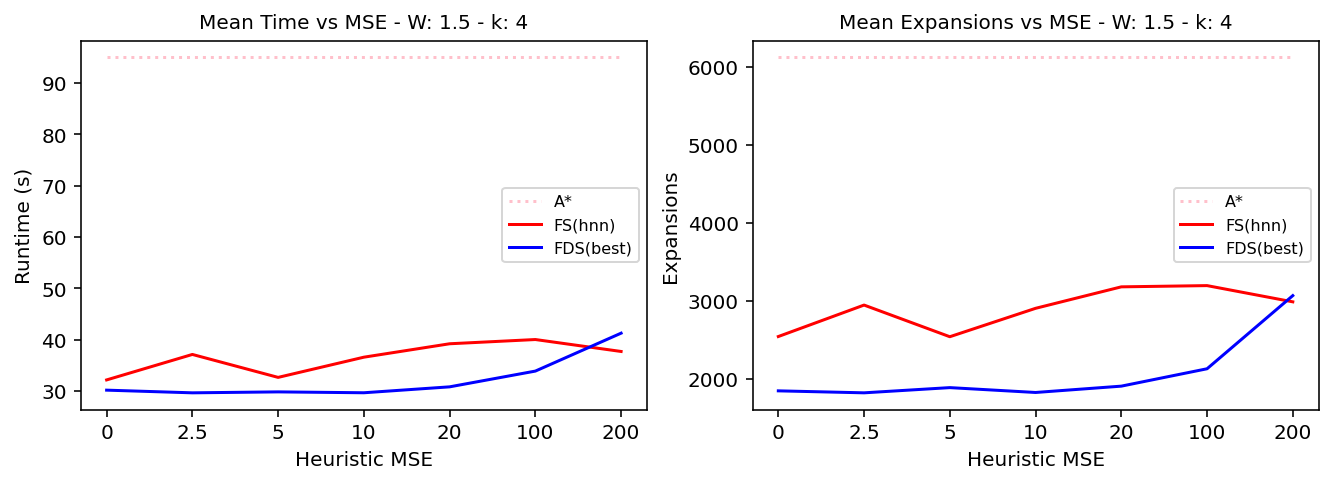

In [33]:
astar_, fs_, best_ = astar1, fs1, best1
minimo = 0
indices = [i for i in range(0, 30)]

# --------------------------------W = 1.5--------------------------------
log = False
w = 1.5
astar = sacar_promedio(astar_, w, indices)
fs = sacar_promedio(fs_, w, indices)
# pos = sacar_promedio(pos_, w, indices)
best = sacar_promedio(best_, w, indices)
# gráfico tiempo vs mse
fig,ax = plt.subplots(dpi=144, figsize = [10,4], ncols=2)
fig.tight_layout(pad=3)
ax[0].plot([1,2,3,4,5,6,7], astar[0], label="A*", c="pink", ls="dotted")
ax[0].plot([1,2,3,4,5,6,7], fs[0], label="FS(hnn)", c="red")
# ax[0].plot([1,2,3,4,5,6,7], pos[0], label="FDS(rank)", c="green")
ax[0].plot([1,2,3,4,5,6,7], best[0], label="FDS(best)", c="blue")
ax[0].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[0].legend(fontsize=8)
ax[0].set_xlabel("Heuristic MSE", fontsize=10)
ax[0].set_ylabel("Runtime (s)", fontsize=10)
ax[0].set_title(f"Mean Time vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")
# gráfico expansiones vs mse
fig.tight_layout(pad=3)
ax[1].plot([1,2,3,4,5,6,7], astar[1], label="A*", c="pink", ls="dotted")
ax[1].plot([1,2,3,4,5,6,7], fs[1], label="FS(hnn)", c="red")
# ax[1].plot([1,2,3,4,5,6,7], pos[1], label="FDS(rank)", c="green")
ax[1].plot([1,2,3,4,5,6,7], best[1], label="FDS(best)", c="blue")
ax[1].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[1].legend(fontsize=8)
ax[1].set_xlabel("Heuristic MSE", fontsize=10)
ax[1].set_ylabel("Expansions", fontsize=10)
ax[1].set_title(f"Mean Expansions vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")

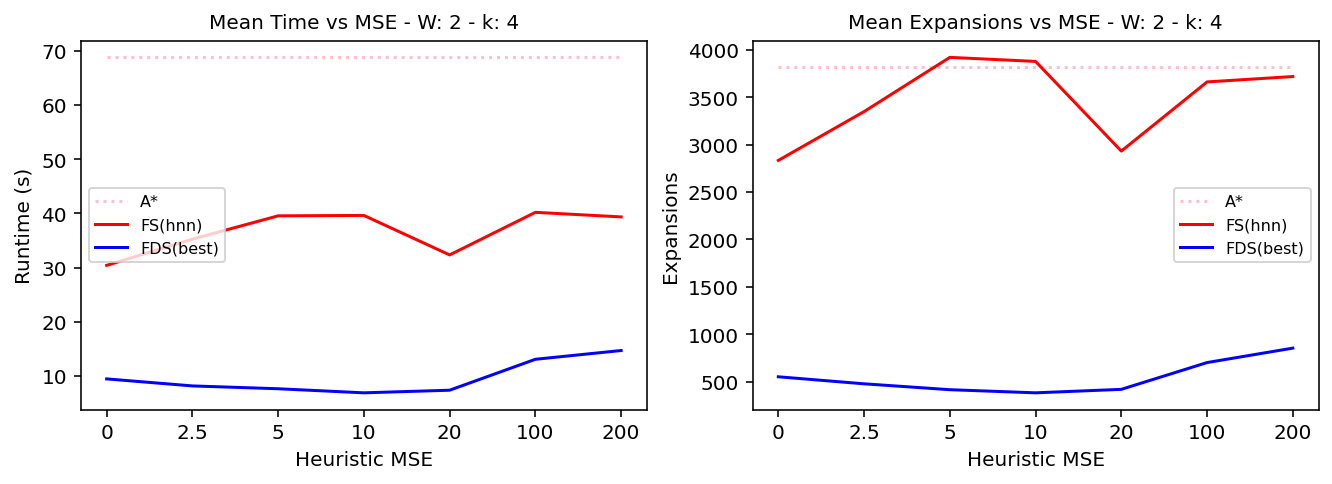

In [34]:
astar_, fs_, best_ = astar1, fs1, best1
minimo = 0
indices = [i for i in range(0, 30)]

# --------------------------------W = 2--------------------------------
log = False
w = 2
astar = sacar_promedio(astar_, w, indices)
fs = sacar_promedio(fs_, w, indices)
# pos = sacar_promedio(pos_, w, indices)
best = sacar_promedio(best_, w, indices)
# gráfico tiempo vs mse
fig,ax = plt.subplots(dpi=144, figsize = [10,4], ncols=2)
fig.tight_layout(pad=3)
ax[0].plot([1,2,3,4,5,6,7], astar[0], label="A*", c="pink", ls="dotted")
ax[0].plot([1,2,3,4,5,6,7], fs[0], label="FS(hnn)", c="red")
# ax[0].plot([1,2,3,4,5,6,7], pos[0], label="FDS(rank)", c="green")
ax[0].plot([1,2,3,4,5,6,7], best[0], label="FDS(best)", c="blue")
ax[0].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[0].legend(fontsize=8)
ax[0].set_xlabel("Heuristic MSE", fontsize=10)
ax[0].set_ylabel("Runtime (s)", fontsize=10)
ax[0].set_title(f"Mean Time vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")
# gráfico expansiones vs mse
fig.tight_layout(pad=3)
ax[1].plot([1,2,3,4,5,6,7], astar[1], label="A*", c="pink", ls="dotted")
ax[1].plot([1,2,3,4,5,6,7], fs[1], label="FS(hnn)", c="red")
# ax[1].plot([1,2,3,4,5,6,7], pos[1], label="FDS(rank)", c="green")
ax[1].plot([1,2,3,4,5,6,7], best[1], label="FDS(best)", c="blue")
ax[1].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[1].legend(fontsize=8)
ax[1].set_xlabel("Heuristic MSE", fontsize=10)
ax[1].set_ylabel("Expansions", fontsize=10)
ax[1].set_title(f"Mean Expansions vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")

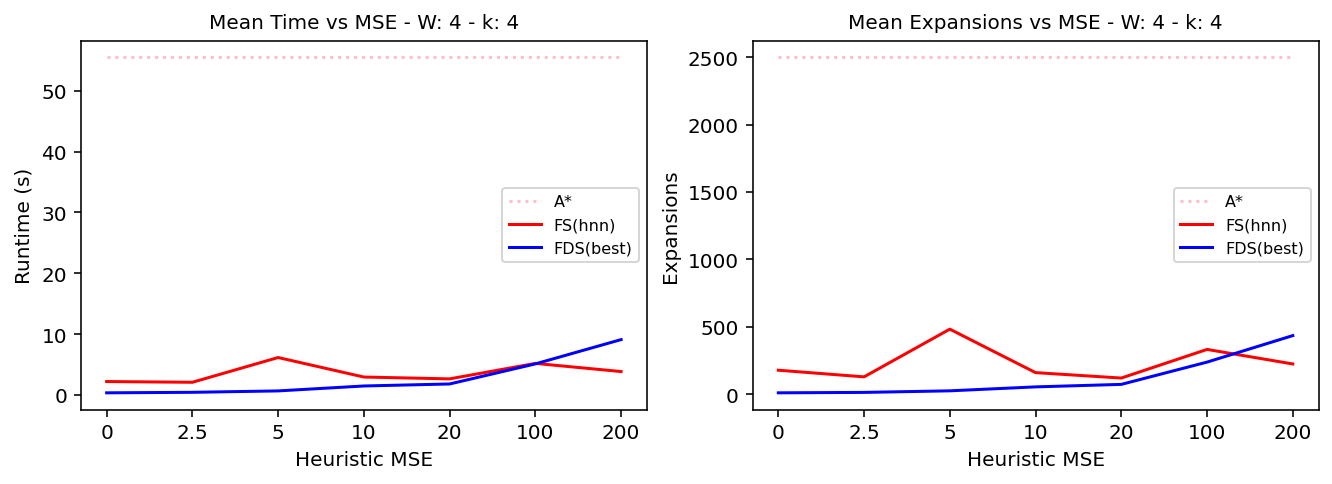

In [35]:
astar_, fs_, best_ = astar1, fs1, best1
minimo = 0
indices = [i for i in range(0, 30)]

# --------------------------------W = 4--------------------------------
log = False
w = 4
astar = sacar_promedio(astar_, w, indices)
fs = sacar_promedio(fs_, w, indices)
# pos = sacar_promedio(pos_, w, indices)
best = sacar_promedio(best_, w, indices)
# gráfico tiempo vs mse
fig,ax = plt.subplots(dpi=144, figsize = [10,4], ncols=2)
fig.tight_layout(pad=3)
ax[0].plot([1,2,3,4,5,6,7], astar[0], label="A*", c="pink", ls="dotted")
ax[0].plot([1,2,3,4,5,6,7], fs[0], label="FS(hnn)", c="red")
# ax[0].plot([1,2,3,4,5,6,7], pos[0], label="FDS(rank)", c="green")
ax[0].plot([1,2,3,4,5,6,7], best[0], label="FDS(best)", c="blue")
ax[0].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[0].legend(fontsize=8)
ax[0].set_xlabel("Heuristic MSE", fontsize=10)
ax[0].set_ylabel("Runtime (s)", fontsize=10)
ax[0].set_title(f"Mean Time vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")
# gráfico expansiones vs mse
fig.tight_layout(pad=3)
ax[1].plot([1,2,3,4,5,6,7], astar[1], label="A*", c="pink", ls="dotted")
ax[1].plot([1,2,3,4,5,6,7], fs[1], label="FS(hnn)", c="red")
# ax[1].plot([1,2,3,4,5,6,7], pos[1], label="FDS(rank)", c="green")
ax[1].plot([1,2,3,4,5,6,7], best[1], label="FDS(best)", c="blue")
ax[1].set_xticks([1,2,3,4,5,6,7], mse)
# ax[0].legend(fontsize=8, loc="upper left")
ax[1].legend(fontsize=8)
ax[1].set_xlabel("Heuristic MSE", fontsize=10)
ax[1].set_ylabel("Expansions", fontsize=10)
ax[1].set_title(f"Mean Expansions vs MSE - W: {w} - k: 4", fontsize=10)
if log:
    plt.yscale("log")